<a href="https://colab.research.google.com/github/Joshmen06/K-Means-Project/blob/main/K_Means_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
data = pd.read_csv("/content/employee-compensation (1).csv")

In [27]:
data.head()

,Organization Group Code,Job Family Code,Job Code,Year Type,Year,Organization Group,Department Code,Department,Union Code,Union,...,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation
0,1,1000,1021,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,37730,57534.65,0.0,0.00,57534.65,11253.16,11961.34,4532.63,27747.13,85281.78
1,1,1000,1023,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,26574,57678.50,0.0,0.00,57678.50,10284.88,7176.80,4755.14,22216.82,79895.32
2,1,1000,1031,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,8148,63532.93,0.0,0.00,63532.93,12495.83,12918.24,4702.71,30116.78,93649.71
3,1,1000,1054,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,27436,101274.51,0.0,-7058.59,94215.92,19644.45,12918.24,7458.76,40021.45,134237.37
4,1,1000,1062,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,37730,5084.00,0.0,0.00,5084.00,1083.90,956.91,387.50,2428.31,7512.31


In [28]:
print("Dimension of dataset:", data.shape)
print("Number of rows in the dataset:", data.shape[0])
print("Number of columns in the dataset:", data.shape[1])

Dimension of dataset: (683277, 22)
Number of rows in the dataset: 683277
Number of columns in the dataset: 22


In [29]:
print("Column Names:",data.columns.values)

Column Names: ['Organization Group Code' 'Job Family Code' 'Job Code' 'Year Type' 'Year'
 'Organization Group' 'Department Code' 'Department' 'Union Code' 'Union'
 'Job Family' 'Job' 'Employee Identifier' 'Salaries' 'Overtime'
 'Other Salaries' 'Total Salary' 'Retirement' 'Health and Dental'
 'Other Benefits' 'Total Benefits' 'Total Compensation']


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683277 entries, 0 to 683276
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Organization Group Code  683277 non-null  int64  
 1   Job Family Code          683277 non-null  object 
 2   Job Code                 683277 non-null  object 
 3   Year Type                683277 non-null  object 
 4   Year                     683277 non-null  int64  
 5   Organization Group       683277 non-null  object 
 6   Department Code          683275 non-null  object 
 7   Department               683275 non-null  object 
 8   Union Code               682926 non-null  float64
 9   Union                    682926 non-null  object 
 10  Job Family               683277 non-null  object 
 11  Job                      683272 non-null  object 
 12  Employee Identifier      683277 non-null  int64  
 13  Salaries                 683277 non-null  float64
 14  Over

In [31]:
data.describe()

,Organization Group Code,Year,Union Code,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation
count,683277.000000,683277.000000,682926.000000,6.832770e+05,683277.000000,683277.000000,683277.000000,683277.000000,683277.000000,683277.000000,683277.000000,683277.000000,683277.000000
mean,2.977943,2016.364632,492.532173,1.708711e+07,69466.271313,5474.598046,3820.481201,78571.040544,13658.900273,9946.864621,5038.753940,28644.518833,107215.559377
std,1.579574,2.092180,330.911187,1.925902e+07,47771.799981,13110.029734,8386.602694,55751.218659,10110.075388,5732.982236,3787.981426,17869.713199,72291.710218
min,1.000000,2013.000000,1.000000,0.000000e+00,-68771.780000,-12308.660000,-19131.100000,-68771.780000,-30621.430000,-3831.090000,-10636.500000,-21295.150000,-74082.610000
25%,2.000000,2015.000000,250.000000,2.545000e+04,29009.540000,0.000000,0.000000,31676.040000,4662.960000,4780.680000,1870.410000,11716.230000,44439.440000
50%,2.000000,2017.000000,535.000000,5.097500e+04,67899.360000,0.000000,706.240000,74870.420000,13858.160000,12500.590000,4876.550000,32521.370000,107529.240000
75%,4.000000,2018.000000,790.000000,3.737703e+07,100416.890000,4223.390000,4362.880000,112666.100000,20151.850000,14037.160000,7525.560000,40915.930000,154170.540000
max,7.000000,2020.000000,990.000000,4.434643e+07,651936.710000,321523.310000,568163.120000,658867.570000,121952.520000,59405.230000,36815.390000,151645.180000,807625.250000


In [32]:
data.shape

(683277, 22)

In [33]:
data.isnull().sum()

Organization Group Code      0
Job Family Code              0
Job Code                     0
Year Type                    0
Year                         0
Organization Group           0
Department Code              2
Department                   2
Union Code                 351
Union                      351
Job Family                   0
Job                          5
Employee Identifier          0
Salaries                     0
Overtime                     0
Other Salaries               0
Total Salary                 0
Retirement                   0
Health and Dental            0
Other Benefits               0
Total Benefits               0
Total Compensation           0
dtype: int64

In [34]:
data=data.dropna()

In [35]:
data.isnull().sum()

Organization Group Code    0
Job Family Code            0
Job Code                   0
Year Type                  0
Year                       0
Organization Group         0
Department Code            0
Department                 0
Union Code                 0
Union                      0
Job Family                 0
Job                        0
Employee Identifier        0
Salaries                   0
Overtime                   0
Other Salaries             0
Total Salary               0
Retirement                 0
Health and Dental          0
Other Benefits             0
Total Benefits             0
Total Compensation         0
dtype: int64

In [36]:
data.drop(['Job Family Code', 'Job Code', 'Year Type', 'Organization Group', 'Department Code', 'Department', 'Union',
       'Job Family', 'Job', 'Salaries', 'Overtime','Other Salaries','Retirement', 'Health and Dental', 'Other Benefits', 'Organization Group Code','Year','Union Code'],axis=1, inplace=True)

In [37]:
data.head()

,Employee Identifier,Total Salary,Total Benefits,Total Compensation
0,37730,57534.65,27747.13,85281.78
1,26574,57678.50,22216.82,79895.32
2,8148,63532.93,30116.78,93649.71
3,27436,94215.92,40021.45,134237.37
4,37730,5084.00,2428.31,7512.31


In [38]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [39]:
K = range(1,10)
KM = [KMeans(n_clusters=k).fit(data) for k in K]
centroids = [k.cluster_centers_ for k in KM]
D_k = [cdist(data, cent, 'euclidean') for cent in centroids]
cIdx = [np.argmin(D,axis=1) for D in D_k]
dist = [np.min(D,axis=1) for D in D_k]
avgWithinSS = [sum(d)/data.shape[0] for d in dist]


Text(0.5, 1.0, 'Elbow for KMeans cluestering')

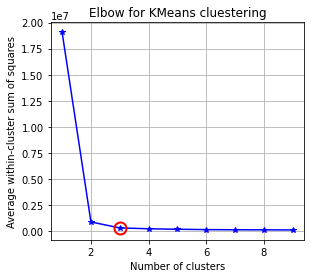

In [40]:
kIdx=2
## Elbow curve
## set the size of the plot
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(K, avgWithinSS, 'b*-')
plt.plot(K[kIdx], avgWithinSS[kIdx], marker = 'o', markersize = 12, markeredgewidth=2, markeredgecolor='r',markerfacecolor='None')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Average within-cluster sum of squares')
plt.title('Elbow for KMeans cluestering')


In [41]:
from sklearn.cluster import KMeans

In [42]:
kmeans=KMeans(n_clusters=3)

In [45]:
data.columns

Index(['Employee Identifier', 'Total Salary', 'Total Benefits',
       'Total Compensation'],
      dtype='object')

In [46]:
kmeans.fit(data)

KMeans(n_clusters=3)

In [47]:
print(kmeans.cluster_centers_)

[[4.15984236e+07 9.17179963e+04 3.38340442e+04 1.25552041e+05]
 [2.85074106e+04 7.23915914e+04 2.66045332e+04 9.89961246e+04]
 [3.73159731e+07 8.39330342e+04 3.00063502e+04 1.13939384e+05]]


In [48]:
y=kmeans.labels_
print(y)

[1 1 1 ... 0 0 0]


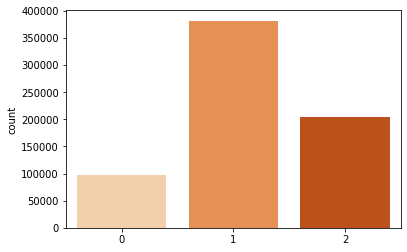

In [50]:
sns.countplot(x=kmeans.labels_,palette='Oranges')
plt.show()

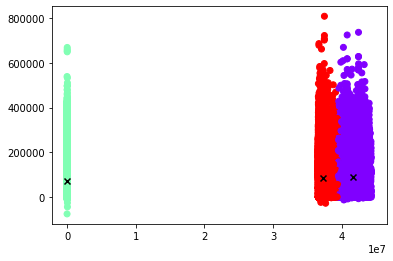

In [51]:
plt.scatter(data.iloc[:,0].values,data.iloc[:,3].values, c=kmeans.labels_, cmap="rainbow")
centers = np.array(kmeans.cluster_centers_)
plt.scatter(centers[:,0], centers[:,1], marker="x", color='k')
plt.show()